# Lab 1

# Exercise 1: Computer Security

An authentication scheme allows a human to log onto a computer over an insecure network. The most familiar scheme is based on passwords where Harry, the human, sends his password to Carole, the computer, and the computer verifies that it is the correct password. However, if Eve, the eavesdropper, can read the bits going over the network, she can learn the password by observing just one log-in.
A more secure scheme is a challenge-response scheme. In a series of trials, Carole repeatedly asks Harry questions that someone not possessing the password would be unlikely to answer correctly. If Harry answers the questions correctly, Carole concludes that Harry knows the password. Let us look at an example.
Suppose the password is an n-bit string, i.e., a vector x with n entries, where the entries are binary (zeros and ones), and chosen uniformly at random. More formally, the vector is said to be defined over GF(2), which is short for Galois Field 2. The field GF(2) has only two elements, 0 and 1. Addition in GF(2) is modulo 2, i.e., equivalent to exclusive-OR. Multiplication in GF(2) is just like ordinary multiplication. In this exercise, all data is assumed to be in GF(2).
In the ith trial, Carole selects a nonzero vector ci, a challenge vector, and sends it to Harry. Harry is required to send back a single bit βi, which is supposed to be the dot product of ci and the password x. Carole then checks whether 𝛽𝑖 = c𝑖 ⋅ x. If Harry passes enough trials, Carole concludes that Harry knows the password, and allows him to log in.

## Question 1
Suppose the password x is 10111. Harry initiates log-in. What is Harry’s response to Carole’s
challenge vectors c1 = 01011 and c2 = 11110.
[NOTE: In Python, the dot product of two vectors v1 = 1101 and v2 = 1111 will return 3. However GF(2) has only the elements 0 and 1. To ensure that the answer is in GF(2), you should compute 3 mod 2.]

In [1]:
# Import libs
import numpy as np

import scipy
from scipy import linalg # need to import this explicitly bc the maintainers decided so...

In [2]:
# Password
pw = np.array([1,0,1,1,1])

# Challenges
c1 = np.array([0,1,0,1,1])
c2 = np.array([1,1,1,1,0])

## Check
b1 = np.dot(pw, c1)%2
b2 = np.dot(pw, c2)%2

print("Challange 1 response (B1):\t", b1)
print("Challange 2 response (B2):\t", b1)

Challange 1 response (B1):	 0
Challange 2 response (B2):	 0


## Question 2

Enter Eve! Suppose Eve had observed Harry’s response ( 𝛽1 𝑎𝑛𝑑 𝛽2) and the first two challenge vectors (c1and c2). Subsequently, she tries to login as Harry and Carole happens to send her as a challenge vector the sum of c1 = 01011 and c2 = 11110. Even though Eve does not know the password, she can use the distributive property to compute the dot product of this sum with the password x:
     
`(01011+11110)⋅x=01011⋅x+11110 ⋅x`

Find the response to this challenge vector without using x. Next, since you know the password, verify that this is indeed the correct response to the challenge vector by adding the terms in the bracket and taking the dot product with x.

In [3]:
# Eve manages to get the exact same challenges (c1 & c2)

# Eve also has the responses to the 2 challenges (b1 & b2)

# So Eve can just do this:

response = (b1 + b2) % 2
print("response:", response)


response: 1


## Question 3

Extending the above idea, Eve can compute the right response to the sum of any number of previous challenges for which she has the right response. Mathematically,

if `c⋅x=𝛽1, c⋅x=𝛽2, c ⋅x=𝛽3`
then `(c1 + c2 + ⋯ + ck)⋅x = (𝛽1 + 𝛽2 + ⋯ +𝛽k)`

Assume Eve knows the following challenges and responses:

|Challenge|Response|
|-------|--------|
|110011|0|
|101010|0|
|111011|1|
|001100|1|

Show how she can derive the right response to two new challenges ca = 011001 and cb = 110111. You can consider your Python script to be a function whose inputs are Ch and c, where Ch is the matrix whose rows are the challenges that she already knows (from the table) and c is either ca or cb. The output of the function will be the response (to ca or cb).
  

In [4]:
Ch = np.array([[1,1,0,0,1,1,0],
               [1,0,1,0,1,0,0],
               [1,1,1,0,1,1,1],
               [0,0,1,1,0,0,1]])

Ch[2]=(Ch[0]+Ch[2])%2
print(Ch)
Ch[3]=(Ch[2]+Ch[3])%2
print(Ch)
Ch[0]=(Ch[0]+Ch[1]+Ch[2])%2
print(Ch)
Ch[1]=(Ch[1]+Ch[2])%2

def response(Ch, c):
    #if challenged 011001
    if c == "011001":
        result = ((Ch[0]+Ch[2]))%2
        #Ch[0] + Ch[2] = 0110010
        return result[6]
    #if challenge 110111
    elif c == "110111":
        result = ((Ch[1]+Ch[0]+Ch[3]))%2
        #Ch[1]+Ch[0]+Ch[3] = 1101110
        return result[6]
    
response(Ch, "110111")

[[1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 1 0 0 1]]
[[1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0]]
[[0 1 0 0 0 1 1]
 [1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0]]


0

## Question 4
Suppose Eve eavesdrops on communication, and learns m pairs (c1, 𝛽1), ⋯ , (c𝑚, 𝛽𝑚) such that 𝛽𝑖
is the correct response to challenge c𝑖. Then the password x is a solution to

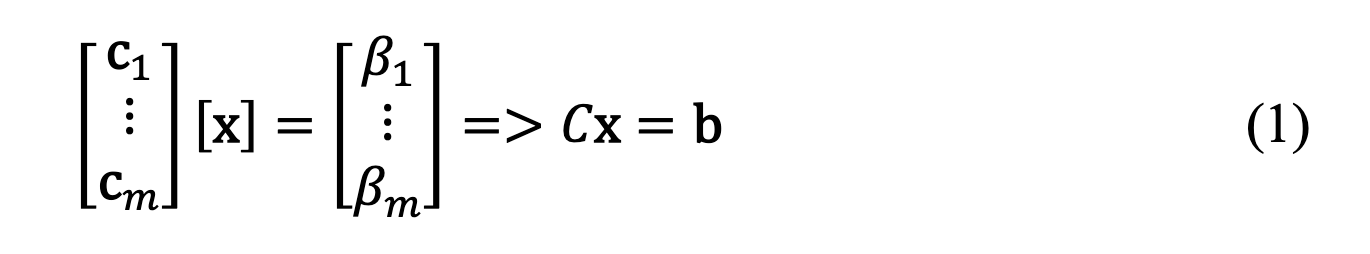

What is the condition on the vectors c1, c2, ⋯ , c𝑚 in eq. (1) to have a solution? In addition to the data in the table in Question 3, she observes the following two responses also:

|Challenge|Response|
|-------|--------|
|011011|0|
|110100|1|

Solve eq. (1) to find the password x. Use scipy.linalg.solve (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html)).

In [5]:
# Our pw is 6 digits so we need 6+ challanges in our matrix

Ch_2 = np.array(
        [[1,1,0,0,1,1],
         [1,0,1,0,1,0],
         [1,1,1,0,1,1],
         [0,0,1,1,0,0],
         [0,1,1,0,1,1], # new!
         [1,1,0,1,0,0]] # new!
)

Bh = np.array([0,0,1,1,0,1])

x = scipy.linalg.solve(Ch_2, Bh) % 2
print("Password is", np.array(x))


Password is [1. 0. 1. 0. 0. 1.]


# Exercise 2: ML - Linear Regression

## Question 5
Consider the following data regarding house prices:

|House|𝑥1 (area in 1000 sq ft)|y (price in 1000 dollars)|
|---|---|---|
|1 | 0.846|115.00|
|2 |1.324|234.50|
|3 |1.150|198.00|
|4 |3.037|528.00|
|5 |3.984|572.50|

What is the matrix 𝐴 and the vector b for the above data?
* WITHOUT using scipy.linalg.solve, solve eq. (1) for m and c.
*  Plot the data (𝑥1, 𝑦) and the fitted line.
    y (price in 1000 dollars) 115.00
    234.50 198.00 528.00 572.50
                  
    ```python
    import matplotlib.pyplot as plt
    xs = np.linspace(0,1,5)
    ys = c + m*xs
    plt.plot(xs,ys,'r',linewidth=4) # plots fitted line 
    plt.scatter(x,y); # plots data(𝑥1, 𝑦)
    plt.show()
    ```

In [6]:
x = np.array([0.846, 1.324, 1.150, 3.037, 3.984])
y = np.array([115.00,234.50,198.00,528.00,572.50]) # array of fitted line
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
sum_xy = np.sum(x*y)

# A = np.array([[sum_x2, sum_x, sum_xy],
#              [sum_x, n, sum_y]])

A = np.array([[sum_x2, sum_x, sum_xy], # aug'd
             [sum_x, n, sum_y]])

b = np.array([[sum_xy],[sum_y]])
print("matrix A before ops:")
print(A)
print()
print("vector b:")
print(b)

matrix A before ops:
[[  28.886817   10.341    4519.844   ]
 [  10.341       5.       1648.      ]]

vector b:
[[4519.844]
 [1648.   ]]


In [7]:
# run elementary row ops on matrix A until row echelon form

A[0] = A[0]/A[0][0]
A[1] = A[1]/A[1][0] - A[0]
A[1] = A[1]/A[1][1]
A[0] = A[0]-(A[1]*A[0][1])

# Printmatrix
print("Matrix A after ops")
print(A)

Matrix A after ops
[[  1.           0.         148.20206538]
 [  0.           1.          23.08848838]]


In [8]:

m = A[0,2]
c = A[1,2]
print("m is:", m)
print("c is:", c)

m is: 148.2020653796153
c is: 23.08848838187969


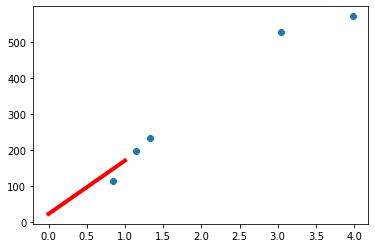

In [9]:
# Plot the data

import matplotlib.pyplot as plt
xs = np.linspace(0,1,5)
ys = c + m*xs
plt.plot(xs,ys,'r',linewidth=4) # plots fitted line
plt.scatter(x,y); # plots data(𝑥1, 𝑦)
plt.show()

## Problem 6

Suppose we have additional information on the houses in the form of number of bedrooms. The
above table including this information is shown below:
...
...

(a) Use scipy.linalg.solve to determine the vector 𝐚.

In [10]:
# We've already imported linalg.solve, so skipping

x1 = [0.846, 1.324, 1.150, 3.037, 3.984]
x2 = [1,2,3,4,5]
y = [115.00, 234.50, 198.00, 528.00, 572.00]

big_x = np.vstack(([1,1,1,1,1], x1, x2)).T  # transpose it!

big_xt_dot_big_x = np.matmul(big_x.T, big_x)

big_xt_dot_y = np.matmul(big_x.T, y)

a = scipy.linalg.solve(big_xt_dot_big_x, big_xt_dot_y)

print("matrix a:")
print(a)



matrix a:
[ 10.12890804 130.52940043  16.470062  ]


(b) Plot the 3D data (𝑥1, 𝑥2, 𝑦) and the fitted plane. [See here for help on 3D plotting]

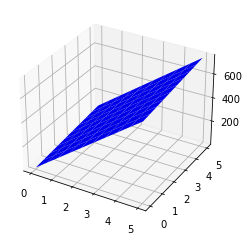

In [11]:
# see: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# now that we have a0, a1 & a2 - we can plot the stuff!!

ax = plt.axes(projection='3d')

x1_lin = np.linspace(0, 5, 10)
x2_lin = np.linspace(0, 5, 10)

x1, y1 = np.meshgrid(x1_lin, x2_lin)
z1 = a[0] + a[1]*x1 + (a[2]*y1)

# todo
ax.plot_surface(x1, y1, z1, color="blue")

# ax.scatter3d(x1, x2, y1)


(c) Using the obtained vector 𝐚, predict the prices of each of the 5 houses.

# Exercise 3: Cryptography - Threshold secret sharing

In [12]:
# Define statics
a0 = np.array([1,1,0,1,0,1])
b0 = np.array([1,1,0,0,1,1])

# a0 . u = s
# u = a0 . s^-1

# def random_vector(s, t):
    
    